# Exercício 1

Uma boa parte do trabalho das disciplinas de Física Experimental é o de calcular ajustes de reta para um dado conjunto de dados e uma teoria.
Considere um conjunto de dados $\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$ para o qual a teoria diz que a relação entre $x$ e $y$ é dada por:

$$
y = a + bx
$$

Sabendo que as medidas estão sujeitas a várias formas de imprecisão e que a teoria não conta com todas tais contribuições, consideremos o modelo pára os dados

$$
y_i = a + bx_i + \xi_i
$$

onde $\xi_i$ são valores de ruído que assumimos ser Gausiano.

Os valores de $a$ e $b$ que melhor descrevem essa teoria devem ser aqueles que maximizam a verossimilhança de obsevar um certo valor de ruído, ou seja, minimizam $\sum_i\xi_i^2 = \sum_i(y_i - a - bx_i)^2$.

A solução desse problema é dada por:
$$
\hat{a} = \bar{y} - \hat{b}\bar{x}\\
\hat{b} = \frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2}
$$

onde
$$
\bar{x} = \frac{1}{n}\sum_i x_i\\
\bar{y} = \frac{1}{n}\sum_i y_i
$$
são as médias amostrais de $x$ e $y$

Com seu conhecimento de Python, implemente funções para calcular a os coeficientes de ajuste da reta e aplique-os para o seguinte conjunto de dados:

In [1]:
from numpy.random import randn, seed
seed(42)
a_real, b_real = 1.75, 3.5
amostra = {x: y for (x, y) in zip([x_i + 0.5*randn() for x_i in range(-20,21)],
                                  [a_real + b_real*x_i + randn() for x_i in range(-20,21)])}

print("""
+--------+--------+
|    x   |    y   |
+--------+--------+
""" + "\n".join([f"| {float(x):6.3} | {y:6.3} |" for (x,y) in amostra.items()]) +\
"""
+--------+--------+""")


+--------+--------+
|    x   |    y   |
+--------+--------+
|  -19.8 |  -68.1 |
|  -19.1 |  -64.9 |
|  -17.7 |  -61.6 |
|  -16.2 |  -59.2 |
|  -16.1 |  -55.0 |
|  -15.1 |  -51.2 |
|  -13.2 |  -46.2 |
|  -12.6 |  -43.4 |
|  -12.2 |  -42.0 |
|  -10.7 |  -36.4 |
|  -10.2 |  -33.6 |
|  -9.23 |  -30.4 |
|  -7.88 |  -25.6 |
|  -7.96 |  -21.7 |
|  -6.86 |  -18.3 |
|  -5.28 |  -16.6 |
|  -4.51 |  -12.6 |
|  -2.84 |  -8.42 |
|  -2.45 |  -4.27 |
|  -1.71 |  -2.23 |
|  0.733 |   1.56 |
|  0.887 |   4.14 |
|   2.03 |   7.55 |
|   2.29 |   13.1 |
|   3.73 |   17.1 |
|   5.06 |   19.2 |
|   5.42 |   23.8 |
|   7.19 |   26.6 |
|    7.7 |   29.1 |
|   8.85 |   33.6 |
|    9.7 |   38.3 |
|   11.9 |   40.2 |
|   12.0 |   45.3 |
|   12.5 |   44.6 |
|   14.4 |   51.6 |
|   14.4 |   54.3 |
|   16.1 |   57.5 |
|   16.0 |   61.3 |
|   17.3 |   62.8 |
|   19.1 |   68.0 |
|   20.4 |   72.1 |
+--------+--------+


No dicionário chamado `amostra`, as chaves são os medidas de $x$ e os valores são as de $y$. 

A linha 

```python
from numpy.random import randn, seed
```

está importando uma função de uma biblioteca para gerar números aleatórios com distribuição normal e uma função para definir o estado inicial do gerador de números (pseudo)aleatórios, para que todos tenham os mesmos dados.

Note que, como os dados são fictícios, sabemos exatamente os valores dos coeficientes linear e angular definidos nas variáveis `a_real` e `b_real`.

Para entender a função `zip`, veja o exemplo a seguir:

In [2]:
tupla1 = (1,2,3,4,5)
tupla2 = (10,20,30,40,50)
zip12 = list(zip(tupla1, tupla2))
unzip1, unzip2 = zip(*zip12)
print(f"""
tupla1 = {tupla1}
tupla2 = {tupla2}
zip12 = {zip12}
unzip1 = {unzip1} == tupla1
unzip2 = {unzip2} == tupla2
""")


tupla1 = (1, 2, 3, 4, 5)
tupla2 = (10, 20, 30, 40, 50)
zip12 = [(1, 10), (2, 20), (3, 30), (4, 40), (5, 50)]
unzip1 = (1, 2, 3, 4, 5) == tupla1
unzip2 = (10, 20, 30, 40, 50) == tupla2



## Solução do Felippe

A forma como vou resolver aqui, embora envolva funções das quais não falei em aula, serve mais para ilustrar como é possível resolver tarefas complexas com, relativamente, poucas linhas de código em python. 
(Lembrem-se, parte da vantagem de usar o jupyter notebook é a facilidade de descobrir coisas novas na linguagem)

Vou colocar a solução aqui e em seguida ilustro algumas coisas

In [3]:
def coeficientes_da_reta(dados):
    x_media, y_media = (sum(a)/len(a) for a in zip(*dados.items()))
    b_hat = sum((x_media - x_i)*(y_media - y_i) 
                for (x_i, y_i) in amostra.items())/sum((x_media - x_i)**2
                                                       for x_i in amostra.keys())
    a_hat = y_media - b_hat*x_media
    return a_hat, b_hat

a_chapeu, b_chapeu = coeficientes_da_reta(amostra)
print(f"""
+---+--------+--------+
|   | Real   | Ajuste |
+---+--------+--------+
| a | {a_real:6.3} | {a_chapeu:6.3} |
| b | {b_real:6.3} | {b_chapeu:6.3} |
+---+--------+--------+
""")


+---+--------+--------+
|   | Real   | Ajuste |
+---+--------+--------+
| a |   1.75 |   2.05 |
| b |    3.5 |   3.53 |
+---+--------+--------+



Para mostrar os dados e a reta, vou usar uma biblioteca para plotar gráficos que veremos logo no curso:

/home/felippe/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


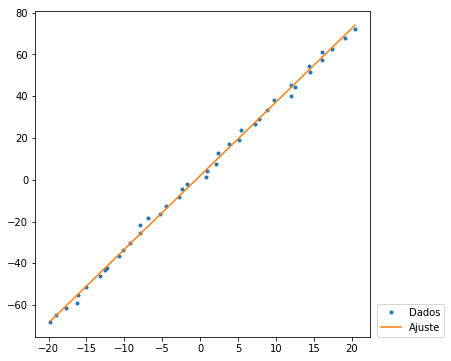

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
x, y = zip(*amostra.items())
ax.plot(x, y, '.',label='Dados')
ax.plot(x, [a_chapeu + b_chapeu*x_i for x_i in x], label='Ajuste')
ax.legend(loc=(1.02,0))

### Recuperando os valores de $x$ e $y$

Sabendo que os valores de $x$ são as chaves e $y$ os valores do dicionário `amostra`, existem alguns modos de definir essas variáveis em uma linha de código:

In [5]:
# modo 1: usando zip e o metodo amostra.items
x_zip, y_zip = zip(*amostra.items())

# modo 2: usando tuple e os metodos amostra.keys e amostra.values
x_method, y_method = tuple(amostra.keys()), tuple(amostra.values())

# modo 3: usando compreensão de lista
x_compr, y_compr = tuple(x for x in amostra), tuple(amostra[x] for x in amostra)

Cada uma tem suas vantagens e desvantagens, mas o ponto é que existem muitas formas de se fazer algo facilmente em python.

### Obtendo as médias amostrais

Novamente, existem alguns modos de se fazer isso em uma linha:

In [6]:
# modo 1: usando zip, amostra.items, sum, len e compreensão de tuplas
x_tup, y_tup = (sum(a)/len(a) for a in zip(*amostra.items()))

# modo 2: usando amostra.keys, amostra.values, map e uma função lambda
x_map, y_map = map(lambda a: sum(a)/len(a), (amostra.keys(), amostra.values()))

## Modo honesto (com as ferramentas que mostrei em aula)

Sabendo atribuir variáveis, aritmética e os `for` loops, é possível calcular os coeficientes lembrando como iterar sobre um dicionário:

In [8]:
x, y = [], []
x_media, y_media = 0, 0
n = 0
for (x_i, y_i) in amostra.items():
    x.append(x_i)    
    y.append(y_i)
    x_media += x_i
    y_media += y_i
    n += 1
x_media /= n
y_media /= n
num, den = 0, 0
for i in range(n):
    num += (x_media - x[i])*(y_media - y[i])
    den += (x_media - x[i])**2
b_chapeu = num/den
a_chapeu = y_media - b_chapeu*x_media

print(f"""
+---+--------+--------+
|   | Real   | Ajuste |
+---+--------+--------+
| a | {a_real:6.3} | {a_chapeu:6.3} |
| b | {b_real:6.3} | {b_chapeu:6.3} |
+---+--------+--------+
""")


+---+--------+--------+
|   | Real   | Ajuste |
+---+--------+--------+
| a |   1.75 |   1.66 |
| b |    3.5 |   3.44 |
+---+--------+--------+

